<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/t%E6%A4%9C%E5%AE%9A%E3%81%A7%E7%90%86%E8%A7%A3%E3%81%99%E3%82%8B%E7%B5%B1%E8%A8%88%E6%A4%9C%E5%AE%9A%E3%81%AE%E8%80%83%E3%81%88%E6%96%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ここでは，統計検定の考え方を最も基本的な検定である母平均のt検定を通じて整理することを目指す．
まとめの方針として，中心極限定理以外の知識については（冗長になるが）すべて述べることにする．
なお，中心極限定理に関しては [Scrapboxの記事](https://scrapbox.io/KeitaWatanabeNote/%E4%B8%AD%E5%BF%83%E6%A5%B5%E9%99%90%E5%AE%9A%E7%90%86%EF%BC%88central_limit_theorem%EF%BC%89)を参照

t検定を理解するために必要なもの
* 中心極限定理を利用した大標本における区間推定
* 少標本に対する区間推定とt分布
* t値とt検定
区間推定：確率分布のパラメタの真の推定値が含まれる区間を確率的に推定すること．


# 中心極限定理を利用した大標本における区間推定
サンプルサイズ$n$が大きいときには中心極限定理を利用して． 区間推定ができる（後述のt分布を用いた区間推定のほうが実用的）．
中心極限定理によると
$$
P\left(a < \frac{n\bar{x} - n\mu}{\sqrt{n}\sigma} < b  \right) \approx \int_{a}^{b} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx
$$
と書ける．ただし$\bar{x}= \frac{1}{n} \sum_{i=1}^n x_i $
$$
a < \frac{n\bar{x} - n\mu}{\sqrt{n}\sigma} < b 
$$
を変形すると
$$
\mu + a \frac{\sigma}{\sqrt{n}} < \bar{x} < \mu + b \frac{\sigma}{\sqrt{n}} 
$$となる．
つまり
$$
P\left(\mu + a \frac{\sigma}{\sqrt{n}} < \bar{x} < \mu + b \frac{\sigma}{\sqrt{n}}   \right) \approx \int_{a}^{b} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx
$$
実は，$a=-1.96, b=1.96$としたとき右辺の積分の値は$0.95$になる

In [ ]:
from sympy import Symbol, pi, exp, sqrt, integrate
from scipy.stats import norm, t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = Symbol('x')
float(integrate(1/sqrt(2.0*pi)*exp(-x**2/2), (x, -1.96, 1.96)))

0.950004209703559

$$
P\left(\bar{x} -1.96 \frac{\sigma}{\sqrt{n}} < \mu < \bar{x} + 1.96 \frac{\sigma}{\sqrt{n}}  \right) \approx \int_{-1.96}^{1.96} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx = 0.95
$$
ここで標準偏差$\sigma$もまた未知なので，不偏分散の平方根$std(x)$で置き換えると
$$
P\left(\bar{x} -1.96 \frac{std(x)}{\sqrt{n}} < \mu < \bar{x} + 1.96 \frac{std(x)}{\sqrt{n}}  \right) \approx \int_{-1.96}^{1.96} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx = 0.95
$$
（ここでは踏み込まないが，この置き換えは厳密には正しくない．なぜならば不偏分散の平方根は不偏統計量ではないため．）

$$
\bar{x} -1.96 \frac{std(x)}{\sqrt{n}} < \mu < \bar{x} + 1.96 \frac{std(x)}{\sqrt{n}}
$$
を95%信頼区間という．次にこの意味するところをシンプルな例で確認する．

例. 

分散1, 平均0の正規分布が真の分布であるとする． この分布から得た$10$個のサンプルを用いて，平均を区間推定するという実験を100回繰り返してみる


In [ ]:
mean = 0
std = 1
lowers, uppers = [], []
n_sample = 100
n_experiments = 100
for _ in range(n_experiments):
  sample = np.random.normal(loc=mean, scale=std, size=n_sample)
  sample_mean = np.mean(sample)
  sample_std = np.std(sample)
  lowers.append(sample_mean  - 1.96 * sample_std / np.sqrt(n_sample))
  uppers.append(sample_mean  + 1.96 * sample_std / np.sqrt(n_sample))

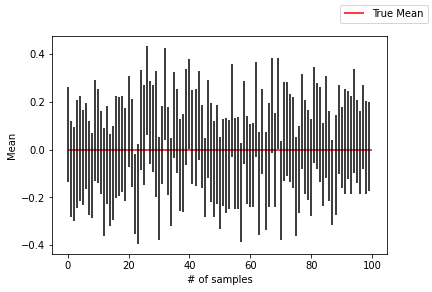

In [ ]:
fig, ax = plt.subplots()
ax.hlines(mean, 0, 100, label="True Mean", color="r")
for idx, (lower, upper) in enumerate(zip(lowers, uppers)):
  ax.vlines(idx, lower, upper)
ax.set_xlabel("# of samples")
ax.set_ylabel("Mean")
fig.legend()

グラフの各縦棒が各実験における95%信頼区間を表す．これを見ると，大半の信頼区間は真の値を含んでいるが，そうでないものも散見されることがわかる．

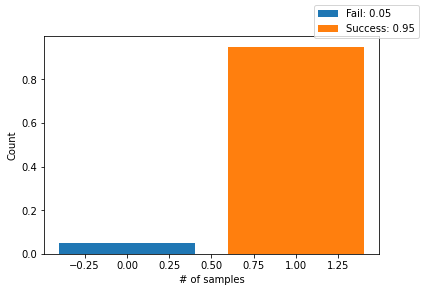

In [ ]:
success = 0
for lower, upper in zip(lowers, uppers):
  if lower <= mean <= upper:
    success += 1
fig, ax = plt.subplots()
ax.bar(0, (n_experiments - success) / n_experiments, label=f"Fail: {(n_experiments - success) / n_experiments}")
ax.bar(1, success / n_experiments, label=f"Success: {success / n_experiments}")
ax.set_xlabel("# of samples")
ax.set_ylabel("Count")
fig.legend()

95%信頼区間の意味がこの例からわかる．すなわち，サンプルをn個用いて95%信頼区間を推定するという実験を100回繰り返したとき，各実験から得られた100個の異なる95%信頼区間のうち，95個が真の値を含むということである．

In [ ]:
mean = 0
std = 1
lowers, uppers = [], []
n_sample = 10
n_experiments = 100
for _ in range(n_experiments):
  sample = np.random.normal(loc=mean, scale=std, size=n_sample)
  sample_mean = np.mean(sample)
  sample_std = np.std(sample)
  lowers.append(sample_mean  - 1.96 * sample_std / np.sqrt(n_sample))
  uppers.append(sample_mean  + 1.96 * sample_std / np.sqrt(n_sample))

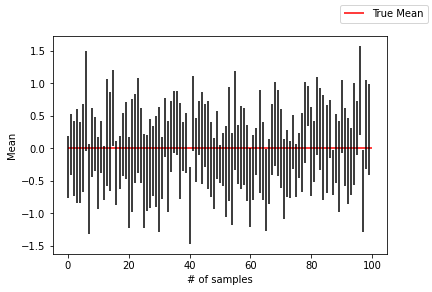

In [ ]:
fig, ax = plt.subplots()
ax.hlines(mean, 0, 100, label="True Mean", color="r")
for idx, (lower, upper) in enumerate(zip(lowers, uppers)):
  ax.vlines(idx, lower, upper)
ax.set_xlabel("# of samples")
ax.set_ylabel("Mean")
fig.legend()

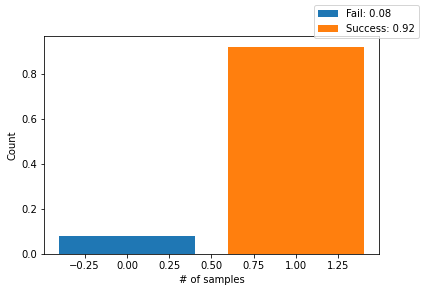

In [ ]:
success = 0
for lower, upper in zip(lowers, uppers):
  if lower <= mean <= upper:
    success += 1
fig, ax = plt.subplots()
ax.bar(0, (n_experiments - success) / n_experiments, label=f"Fail: {(n_experiments - success) / n_experiments}")
ax.bar(1, success / n_experiments, label=f"Success: {success / n_experiments}")
ax.set_xlabel("# of samples")
ax.set_ylabel("Count")
fig.legend()

サンプル数が少ないときには誤差が大きい

In [ ]:
mean = 0
std = 1
lowers_norm, uppers_norm = [], []
lowers_t, uppers_t = [], []
n_samples = 10
n_experiments = 100
for _ in range(n_experiments):
  sample = np.random.normal(loc=mean, scale=std, size=n_sample)
  sample_mean = np.mean(sample)
  sample_std = np.std(sample)
  lowers_norm.append(sample_mean  - norm.ppf(0.975) * sample_std / np.sqrt(n_sample))
  uppers_norm.append(sample_mean  + norm.ppf(0.975)* sample_std / np.sqrt(n_sample))
  lowers_t.append(sample_mean  - t.ppf(0.975, df=n_sample-1) * sample_std / np.sqrt(n_sample))
  uppers_t.append(sample_mean  + t.ppf(0.975, df=n_sample-1) * sample_std / np.sqrt(n_sample))  

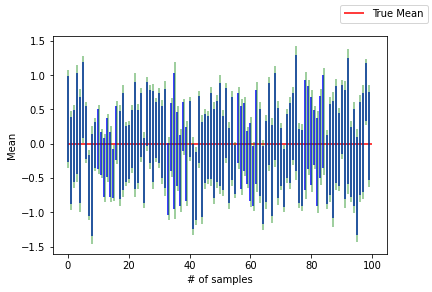

In [ ]:
fig, ax = plt.subplots()
ax.hlines(mean, 0, 100, label="True Mean", color="r")
for idx, (lower, upper) in enumerate(zip(lowers_norm, uppers_norm)):
  ax.vlines(idx, lower, upper, color="b")
for idx, (lower, upper) in enumerate(zip(lowers_t, uppers_t)):
  ax.vlines(idx+0.1, lower, upper, color="g", alpha=0.5) 
ax.set_xlabel("# of samples")
ax.set_ylabel("Mean")
fig.legend()

# t分布の導入

hogehoge

青が正規分布を用いて区間推定を行った場合，緑がt分布を用いて区間推定を用いた場合．青が外れている場合でも，緑が真の値を含んでいることに注意

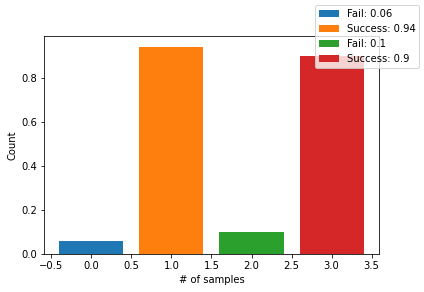

In [ ]:
success_t = 0
for lower, upper in zip(lowers_t, uppers_t):
  if lower <= mean <= upper:
    success_t += 1
success_n = 0
for lower, upper in zip(lowers_norm, uppers_norm):
  if lower <= mean <= upper:
    success_n += 1

fig, ax = plt.subplots()
ax.bar(0, (n_experiments - success_t) / n_experiments, label=f"Fail: {(n_experiments - success_t) / n_experiments}")
ax.bar(1, success_t / n_experiments, label=f"Success: {success_t / n_experiments}")
ax.bar(2, (n_experiments - success_n) / n_experiments, label=f"Fail: {(n_experiments - success_n) / n_experiments}")
ax.bar(3, success_n / n_experiments, label=f"Success: {success_n / n_experiments}")
ax.set_xlabel("# of samples")
ax.set_ylabel("Count")
fig.legend()

このように，少標本においてt分布を用いた区間推定のほうが誤差が少ないことがわかる

t分布に従うのはわかっています．とただ実用上は真の平均はわからない．そこでどういうことを行うか，母平均のt検定である．この検定は適当に平均を仮定したt分布から（ここから帰無仮説の解説につなげる），実験で得られた値が生成される確率を見積もることで，どの程度その過程が尤もらしいかを評価する．その確率がある値（これを有意水準といい，$p=0.05$などが用いられる）を下回ったとき，その仮定を棄却する．

# P値についての議論

検出力，効果量，